In [1]:
from explain import perturb_explanation
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.misc import imread
from skimage.transform import resize

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
orig_mask = perturb_explanation()

explain.py:215: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  target = torch.nn.Softmax()(model(img))


Category with highest probability: flute (0.3737)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.080719	Tot Loss 0.085719	
Epoch 25	L1 Loss 0.002714	TV Loss 0.002888	Less Loss 0.000000	Class Loss 0.000186	Tot Loss 0.005787	
Epoch 50	L1 Loss 0.002360	TV Loss 0.000841	Less Loss 0.000000	Class Loss 0.000120	Tot Loss 0.003320	
Epoch 75	L1 Loss 0.001983	TV Loss 0.000516	Less Loss 0.000000	Class Loss 0.000114	Tot Loss 0.002614	
Epoch 100	L1 Loss 0.001681	TV Loss 0.000413	Less Loss 0.000000	Class Loss 0.000124	Tot Loss 0.002219	
Epoch 125	L1 Loss 0.001441	TV Loss 0.000381	Less Loss 0.000000	Class Loss 0.000143	Tot Loss 0.001965	
Epoch 150	L1 Loss 0.001268	TV Loss 0.000372	Less Loss 0.000000	Class Loss 0.000175	Tot Loss 0.001815	
Epoch 175	L1 Loss 0.001154	TV Loss 0.000371	Less Loss 0.000000	Class Loss 0.000197	Tot Loss 0.001722	
Epoch 200	L1 Loss 0.001090	TV Loss 0.000358	Less Loss 0.000000	Class Loss 0.000207	Tot Loss 0.001655	
Epoch 225	L1 Loss 0.001

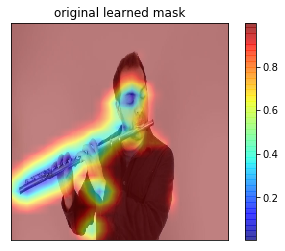

In [28]:
image = 'examples/flute.jpg'
img = resize(imread(image), (227,227))

f, ax = plt.subplots(1,1)
ax.imshow(img)
cax = ax.imshow(orig_mask, alpha=0.5, cmap='jet')
f.colorbar(cax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('original learned mask')
plt.show()

In [5]:
alexnet_weight_layers = ['features.0', 'features.3', 'features.6', 'features.8', 'features.10', 
                         'classifier.1', 'classifier.4', 'classifier.6']
blob_names = ['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']

In [6]:
masks_rand = np.zeros((len(alexnet_weight_layers), orig_mask.shape[0], orig_mask.shape[1]))

In [7]:
for i in range(len(masks_rand)):
    masks_rand[i] = perturb_explanation(randomize_blob=alexnet_weight_layers[i])

Category with highest probability: hen (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.006026	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 225	L1 Loss 0.00000

Epoch 150	L1 Loss 0.000714	TV Loss 0.000315	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.002210	
Epoch 175	L1 Loss 0.000716	TV Loss 0.000316	Less Loss 0.000000	Class Loss 0.001176	Tot Loss 0.002209	
Epoch 200	L1 Loss 0.000715	TV Loss 0.000319	Less Loss 0.000000	Class Loss 0.001176	Tot Loss 0.002209	
Epoch 225	L1 Loss 0.000717	TV Loss 0.000314	Less Loss 0.000000	Class Loss 0.001179	Tot Loss 0.002209	
Epoch 250	L1 Loss 0.000715	TV Loss 0.000315	Less Loss 0.000000	Class Loss 0.001177	Tot Loss 0.002208	
Epoch 275	L1 Loss 0.000720	TV Loss 0.000314	Less Loss 0.000000	Class Loss 0.001174	Tot Loss 0.002207	
Category with highest probability: strawberry (0.0055)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002080	Tot Loss 0.007080	
Epoch 25	L1 Loss 0.000662	TV Loss 0.000265	Less Loss 0.000000	Class Loss 0.000938	Tot Loss 0.001866	
Epoch 50	L1 Loss 0.000645	TV Loss 0.000237	Less Loss 0.000000	Class Loss 0.000934	Tot Loss 0.001815	
Epoch 75	L1 Loss 

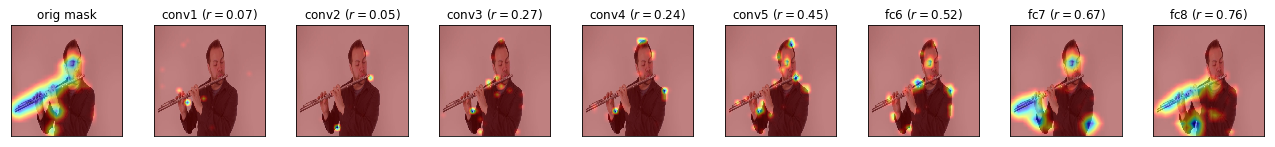

In [25]:
f, ax = plt.subplots(1,1+len(masks_rand), figsize=(2*(1+len(masks_rand)),2))
for i in range(1+len(masks_rand)):
    ax[i].imshow(img)
    if i == 0:
        ax[i].imshow(orig_mask, alpha=0.5, cmap='jet')
        ax[i].set_title('orig mask')
    else:
        ax[i].imshow(masks_rand[i-1], alpha=0.5, cmap='jet')
        ax[i].set_title('%s ($r=%.2f$)' % (blob_names[i-1], 
                                          spearmanr(np.abs(masks_rand[i-1].flatten()), np.abs(orig_mask.flatten())).correlation))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [9]:
for i in range(len(masks_rand)):
    res = spearmanr(masks_rand[i].flatten(), orig_mask.flatten())
    print '%s: %.2f' % (blob_names[i], res.correlation)

conv1: 0.07
conv2: 0.05
conv3: 0.27
conv4: 0.24
conv5: 0.45
fc6: 0.52
fc7: 0.67
fc8: 0.76


In [11]:
num_samples = 100
coerrs = np.zeros((num_samples, len(alexnet_weight_layers)))
for i in range(num_samples):
    for j in range(len(masks_rand)):
        rand_mask = perturb_explanation(randomize_blob=alexnet_weight_layers[j])
        coerrs[i][j] = spearmanr(rand_mask.flatten(), orig_mask.flatten()).correlation

Category with highest probability: green lizard (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.006026	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 225	L1 Los

Epoch 100	L1 Loss 0.000705	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.001576	Tot Loss 0.002541	
Epoch 125	L1 Loss 0.000706	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.001575	Tot Loss 0.002541	
Epoch 150	L1 Loss 0.000705	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.001577	Tot Loss 0.002542	
Epoch 175	L1 Loss 0.000709	TV Loss 0.000259	Less Loss 0.000000	Class Loss 0.001576	Tot Loss 0.002543	
Epoch 200	L1 Loss 0.000704	TV Loss 0.000255	Less Loss 0.000000	Class Loss 0.001582	Tot Loss 0.002541	
Epoch 225	L1 Loss 0.000703	TV Loss 0.000255	Less Loss 0.000000	Class Loss 0.001585	Tot Loss 0.002542	
Epoch 250	L1 Loss 0.000707	TV Loss 0.000263	Less Loss 0.000000	Class Loss 0.001571	Tot Loss 0.002541	
Epoch 275	L1 Loss 0.000703	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.002542	
Category with highest probability: gorilla (0.0045)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002542	Tot Loss 0.007542	
Epoch 25	L1 Loss 0

Epoch 250	L1 Loss 0.000025	TV Loss 0.000006	Less Loss 0.000000	Class Loss 0.001547	Tot Loss 0.001578	
Epoch 275	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001548	Tot Loss 0.001577	
Category with highest probability: barbershop (0.0019)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001758	Tot Loss 0.006758	
Epoch 25	L1 Loss 0.000173	TV Loss 0.000067	Less Loss 0.000000	Class Loss 0.001630	Tot Loss 0.001870	
Epoch 50	L1 Loss 0.000179	TV Loss 0.000064	Less Loss 0.000000	Class Loss 0.001622	Tot Loss 0.001865	
Epoch 75	L1 Loss 0.000181	TV Loss 0.000065	Less Loss 0.000000	Class Loss 0.001619	Tot Loss 0.001865	
Epoch 100	L1 Loss 0.000182	TV Loss 0.000065	Less Loss 0.000000	Class Loss 0.001619	Tot Loss 0.001865	
Epoch 125	L1 Loss 0.000180	TV Loss 0.000065	Less Loss 0.000000	Class Loss 0.001620	Tot Loss 0.001865	
Epoch 150	L1 Loss 0.000183	TV Loss 0.000066	Less Loss 0.000000	Class Loss 0.001617	Tot Loss 0.001865	
Epoch 175	L1 Loss 

Epoch 50	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001296	Tot Loss 0.001297	
Epoch 100	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 125	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 150	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 175	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	Tot Loss 0.001297	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001295	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Category with highest probability: Irish water spaniel (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001102	Tot Loss 0.006102	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001169	Tot Loss 0.001169	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001169	Tot Loss 0.001169	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001168	Tot Loss 0.001169	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001168	Tot Loss 0.001169	
Epoch 125

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	T

Epoch 200	L1 Loss 0.000900	TV Loss 0.000343	Less Loss 0.000000	Class Loss 0.001615	Tot Loss 0.002858	
Epoch 225	L1 Loss 0.000898	TV Loss 0.000341	Less Loss 0.000000	Class Loss 0.001625	Tot Loss 0.002863	
Epoch 250	L1 Loss 0.000903	TV Loss 0.000341	Less Loss 0.000000	Class Loss 0.001620	Tot Loss 0.002863	
Epoch 275	L1 Loss 0.000897	TV Loss 0.000352	Less Loss 0.000000	Class Loss 0.001610	Tot Loss 0.002859	
Category with highest probability: earthstar (0.0045)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002987	Tot Loss 0.007987	
Epoch 25	L1 Loss 0.000685	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.001086	Tot Loss 0.002032	
Epoch 50	L1 Loss 0.000668	TV Loss 0.000226	Less Loss 0.000000	Class Loss 0.001076	Tot Loss 0.001970	
Epoch 75	L1 Loss 0.000687	TV Loss 0.000227	Less Loss 0.000000	Class Loss 0.001049	Tot Loss 0.001964	
Epoch 100	L1 Loss 0.000685	TV Loss 0.000226	Less Loss 0.000000	Class Loss 0.001053	Tot Loss 0.001964	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000074	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001828	Tot Loss 0.001921	
Epoch 75	L1 Loss 0.000072	TV Loss 0.000018	Less Loss 0.000000	Class Loss 0.001831	Tot Loss 0.001920	
Epoch 100	L1 Loss 0.000070	TV Loss 0.000017	Less Loss 0.000000	Class Loss 0.001833	Tot Loss 0.001920	
Epoch 125	L1 Loss 0.000072	TV Loss 0.000018	Less Loss 0.000000	Class Loss 0.001830	Tot Loss 0.001921	
Epoch 150	L1 Loss 0.000073	TV Loss 0.000017	Less Loss 0.000000	Class Loss 0.001830	Tot Loss 0.001920	
Epoch 175	L1 Loss 0.000072	TV Loss 0.000017	Less Loss 0.000000	Class Loss 0.001832	Tot Loss 0.001921	
Epoch 200	L1 Loss 0.000073	TV Loss 0.000018	Less Loss 0.000000	Class Loss 0.001829	Tot Loss 0.001920	
Epoch 225	L1 Loss 0.000071	TV Loss 0.000018	Less Loss 0.000000	Class Loss 0.001832	Tot Loss 0.001921	
Epoch 250	L1 Loss 0.000074	TV Loss 0.000018	Less Loss 0.000000	Class Loss 0.001830	Tot Loss 0.001921	
Epoch 275	L1 Loss 0.000076	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001826	T

Epoch 200	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001274	Tot Loss 0.001276	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001274	Tot Loss 0.001276	
Epoch 250	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001273	Tot Loss 0.001276	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001274	Tot Loss 0.001276	
Category with highest probability: valley (0.0016)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001462	Tot Loss 0.006462	
Epoch 25	L1 Loss 0.000029	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001566	Tot Loss 0.001602	
Epoch 50	L1 Loss 0.000024	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001573	Tot Loss 0.001600	
Epoch 75	L1 Loss 0.000025	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001572	Tot Loss 0.001600	
Epoch 100	L1 Loss 0.000024	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001573	Tot Loss 0.001600	
Epoch 125	L1 Loss 0.00

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	Tot Loss 0.001159	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001158	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Category with highest probability: accordion (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001053	Tot Loss 0.006053	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001082	Tot Loss 0.001082	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001082	Tot Loss 0.001082	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001082	Tot Loss 0.001082	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001082	Tot Loss 0.001082	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000787	TV Loss 0.000470	Less Loss 0.000000	Class Loss 0.001499	Tot Loss 0.002756	
Epoch 75	L1 Loss 0.000769	TV Loss 0.000456	Less Loss 0.000000	Class Loss 0.001514	Tot Loss 0.002739	
Epoch 100	L1 Loss 0.000772	TV Loss 0.000459	Less Loss 0.000000	Class Loss 0.001508	Tot Loss 0.002738	
Epoch 125	L1 Loss 0.000773	TV Loss 0.000460	Less Loss 0.000000	Class Loss 0.001506	Tot Loss 0.002738	
Epoch 150	L1 Loss 0.000771	TV Loss 0.000462	Less Loss 0.000000	Class Loss 0.001505	Tot Loss 0.002738	
Epoch 175	L1 Loss 0.000771	TV Loss 0.000462	Less Loss 0.000000	Class Loss 0.001506	Tot Loss 0.002738	
Epoch 200	L1 Loss 0.000773	TV Loss 0.000461	Less Loss 0.000000	Class Loss 0.001507	Tot Loss 0.002740	
Epoch 225	L1 Loss 0.000771	TV Loss 0.000461	Less Loss 0.000000	Class Loss 0.001508	Tot Loss 0.002740	
Epoch 250	L1 Loss 0.000772	TV Loss 0.000461	Less Loss 0.000000	Class Loss 0.001506	Tot Loss 0.002739	
Epoch 275	L1 Loss 0.000771	TV Loss 0.000465	Less Loss 0.000000	Class Loss 0.001505	T

Epoch 200	L1 Loss 0.000079	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001513	Tot Loss 0.001616	
Epoch 225	L1 Loss 0.000079	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001513	Tot Loss 0.001615	
Epoch 250	L1 Loss 0.000077	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001515	Tot Loss 0.001616	
Epoch 275	L1 Loss 0.000075	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001518	Tot Loss 0.001615	
Category with highest probability: jellyfish (0.0046)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002409	Tot Loss 0.007409	
Epoch 25	L1 Loss 0.000865	TV Loss 0.000361	Less Loss 0.000000	Class Loss 0.001206	Tot Loss 0.002433	
Epoch 50	L1 Loss 0.000828	TV Loss 0.000362	Less Loss 0.000000	Class Loss 0.001190	Tot Loss 0.002380	
Epoch 75	L1 Loss 0.000826	TV Loss 0.000361	Less Loss 0.000000	Class Loss 0.001187	Tot Loss 0.002374	
Epoch 100	L1 Loss 0.000831	TV Loss 0.000359	Less Loss 0.000000	Class Loss 0.001186	Tot Loss 0.002375	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000046	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001775	Tot Loss 0.001832	
Epoch 75	L1 Loss 0.000047	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001775	Tot Loss 0.001832	
Epoch 100	L1 Loss 0.000046	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001776	Tot Loss 0.001832	
Epoch 125	L1 Loss 0.000046	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001776	Tot Loss 0.001832	
Epoch 150	L1 Loss 0.000047	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001776	Tot Loss 0.001832	
Epoch 175	L1 Loss 0.000048	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001774	Tot Loss 0.001832	
Epoch 200	L1 Loss 0.000048	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001775	Tot Loss 0.001832	
Epoch 225	L1 Loss 0.000047	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001776	Tot Loss 0.001832	
Epoch 250	L1 Loss 0.000049	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001775	Tot Loss 0.001833	
Epoch 275	L1 Loss 0.000048	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001776	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001154	Tot Loss 0.001155	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001154	Tot Loss 0.001155	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001154	Tot Loss 0.001154	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001154	Tot Loss 0.001155	
Category with highest probability: trilobite (0.0013)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001195	Tot Loss 0.006195	
Epoch 25	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001306	Tot Loss 0.001310	
Epoch 50	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001305	Tot Loss 0.001310	
Epoch 75	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001305	Tot Loss 0.001310	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001305	Tot Loss 0.001310	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	Tot Loss 0.001062	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001062	T

Epoch 200	L1 Loss 0.000685	TV Loss 0.000270	Less Loss 0.000000	Class Loss 0.001034	Tot Loss 0.001989	
Epoch 225	L1 Loss 0.000679	TV Loss 0.000264	Less Loss 0.000000	Class Loss 0.001046	Tot Loss 0.001989	
Epoch 250	L1 Loss 0.000686	TV Loss 0.000272	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001988	
Epoch 275	L1 Loss 0.000691	TV Loss 0.000271	Less Loss 0.000000	Class Loss 0.001024	Tot Loss 0.001986	
Category with highest probability: aircraft carrier (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.006026	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 125	L1

Epoch 50	L1 Loss 0.000747	TV Loss 0.000244	Less Loss 0.000000	Class Loss 0.001459	Tot Loss 0.002450	
Epoch 75	L1 Loss 0.000744	TV Loss 0.000244	Less Loss 0.000000	Class Loss 0.001457	Tot Loss 0.002445	
Epoch 100	L1 Loss 0.000756	TV Loss 0.000244	Less Loss 0.000000	Class Loss 0.001446	Tot Loss 0.002447	
Epoch 125	L1 Loss 0.000756	TV Loss 0.000245	Less Loss 0.000000	Class Loss 0.001444	Tot Loss 0.002445	
Epoch 150	L1 Loss 0.000742	TV Loss 0.000246	Less Loss 0.000000	Class Loss 0.001457	Tot Loss 0.002445	
Epoch 175	L1 Loss 0.000751	TV Loss 0.000238	Less Loss 0.000000	Class Loss 0.001457	Tot Loss 0.002445	
Epoch 200	L1 Loss 0.000751	TV Loss 0.000245	Less Loss 0.000000	Class Loss 0.001449	Tot Loss 0.002446	
Epoch 225	L1 Loss 0.000748	TV Loss 0.000242	Less Loss 0.000000	Class Loss 0.001459	Tot Loss 0.002449	
Epoch 250	L1 Loss 0.000756	TV Loss 0.000243	Less Loss 0.000000	Class Loss 0.001447	Tot Loss 0.002446	
Epoch 275	L1 Loss 0.000749	TV Loss 0.000247	Less Loss 0.000000	Class Loss 0.001451	T

Epoch 200	L1 Loss 0.000022	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001658	Tot Loss 0.001684	
Epoch 225	L1 Loss 0.000022	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001658	Tot Loss 0.001683	
Epoch 250	L1 Loss 0.000022	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001658	Tot Loss 0.001683	
Epoch 275	L1 Loss 0.000023	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001658	Tot Loss 0.001684	
Category with highest probability: mashed potato (0.0017)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001458	Tot Loss 0.006458	
Epoch 25	L1 Loss 0.000167	TV Loss 0.000051	Less Loss 0.000000	Class Loss 0.001478	Tot Loss 0.001696	
Epoch 50	L1 Loss 0.000164	TV Loss 0.000055	Less Loss 0.000000	Class Loss 0.001469	Tot Loss 0.001688	
Epoch 75	L1 Loss 0.000165	TV Loss 0.000056	Less Loss 0.000000	Class Loss 0.001467	Tot Loss 0.001688	
Epoch 100	L1 Loss 0.000164	TV Loss 0.000057	Less Loss 0.000000	Class Loss 0.001467	Tot Loss 0.001688	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001262	
Epoch 75	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001261	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001261	
Epoch 125	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001261	
Epoch 150	L1 Loss 0.000006	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001262	
Epoch 175	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001257	Tot Loss 0.001261	
Epoch 200	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001261	
Epoch 225	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001257	Tot Loss 0.001262	
Epoch 250	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001261	
Epoch 275	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001060	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001060	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001060	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001060	
Category with highest probability: letter opener (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001140	Tot Loss 0.006140	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001203	Tot Loss 0.001204	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001203	Tot Loss 0.001204	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001204	Tot Loss 0.001204	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001203	Tot Loss 0.001204	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	T

Epoch 200	L1 Loss 0.000644	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.001209	Tot Loss 0.002131	
Epoch 225	L1 Loss 0.000643	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.001211	Tot Loss 0.002130	
Epoch 250	L1 Loss 0.000642	TV Loss 0.000282	Less Loss 0.000000	Class Loss 0.001207	Tot Loss 0.002131	
Epoch 275	L1 Loss 0.000643	TV Loss 0.000276	Less Loss 0.000000	Class Loss 0.001212	Tot Loss 0.002131	
Category with highest probability: trimaran (0.0051)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001965	Tot Loss 0.006965	
Epoch 25	L1 Loss 0.000681	TV Loss 0.000278	Less Loss 0.000000	Class Loss 0.000934	Tot Loss 0.001893	
Epoch 50	L1 Loss 0.000663	TV Loss 0.000280	Less Loss 0.000000	Class Loss 0.000900	Tot Loss 0.001843	
Epoch 75	L1 Loss 0.000628	TV Loss 0.000261	Less Loss 0.000000	Class Loss 0.000932	Tot Loss 0.001821	
Epoch 100	L1 Loss 0.000629	TV Loss 0.000265	Less Loss 0.000000	Class Loss 0.000924	Tot Loss 0.001819	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000085	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001478	Tot Loss 0.001586	
Epoch 75	L1 Loss 0.000085	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001477	Tot Loss 0.001586	
Epoch 100	L1 Loss 0.000085	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001475	Tot Loss 0.001586	
Epoch 125	L1 Loss 0.000086	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001476	Tot Loss 0.001585	
Epoch 150	L1 Loss 0.000085	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001475	Tot Loss 0.001585	
Epoch 175	L1 Loss 0.000086	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001476	Tot Loss 0.001586	
Epoch 200	L1 Loss 0.000085	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001477	Tot Loss 0.001586	
Epoch 225	L1 Loss 0.000084	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001477	Tot Loss 0.001585	
Epoch 250	L1 Loss 0.000084	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001478	Tot Loss 0.001585	
Epoch 275	L1 Loss 0.000084	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001478	T

Epoch 200	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001254	Tot Loss 0.001257	
Epoch 225	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001254	Tot Loss 0.001258	
Epoch 250	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001253	Tot Loss 0.001258	
Epoch 275	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001253	Tot Loss 0.001257	
Category with highest probability: Gordon setter (0.0017)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001482	Tot Loss 0.006482	
Epoch 25	L1 Loss 0.000040	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001634	Tot Loss 0.001682	
Epoch 50	L1 Loss 0.000036	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001635	Tot Loss 0.001680	
Epoch 75	L1 Loss 0.000036	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001636	Tot Loss 0.001681	
Epoch 100	L1 Loss 0.000036	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001636	Tot Loss 0.001680	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 75	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 100	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 125	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 150	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	Tot Loss 0.001146	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001144	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Category with highest probability: power drill (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001047	Tot Loss 0.006047	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000514	TV Loss 0.000174	Less Loss 0.000000	Class Loss 0.000698	Tot Loss 0.001385	
Epoch 75	L1 Loss 0.000515	TV Loss 0.000177	Less Loss 0.000000	Class Loss 0.000689	Tot Loss 0.001382	
Epoch 100	L1 Loss 0.000517	TV Loss 0.000177	Less Loss 0.000000	Class Loss 0.000689	Tot Loss 0.001382	
Epoch 125	L1 Loss 0.000517	TV Loss 0.000176	Less Loss 0.000000	Class Loss 0.000689	Tot Loss 0.001382	
Epoch 150	L1 Loss 0.000517	TV Loss 0.000175	Less Loss 0.000000	Class Loss 0.000690	Tot Loss 0.001383	
Epoch 175	L1 Loss 0.000518	TV Loss 0.000175	Less Loss 0.000000	Class Loss 0.000689	Tot Loss 0.001383	
Epoch 200	L1 Loss 0.000518	TV Loss 0.000175	Less Loss 0.000000	Class Loss 0.000690	Tot Loss 0.001382	
Epoch 225	L1 Loss 0.000514	TV Loss 0.000177	Less Loss 0.000000	Class Loss 0.000692	Tot Loss 0.001383	
Epoch 250	L1 Loss 0.000517	TV Loss 0.000175	Less Loss 0.000000	Class Loss 0.000691	Tot Loss 0.001383	
Epoch 275	L1 Loss 0.000519	TV Loss 0.000178	Less Loss 0.000000	Class Loss 0.000686	T

Epoch 200	L1 Loss 0.000119	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001465	Tot Loss 0.001624	
Epoch 225	L1 Loss 0.000119	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001465	Tot Loss 0.001624	
Epoch 250	L1 Loss 0.000123	TV Loss 0.000040	Less Loss 0.000000	Class Loss 0.001462	Tot Loss 0.001624	
Epoch 275	L1 Loss 0.000120	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001465	Tot Loss 0.001624	
Category with highest probability: miniature poodle (0.0038)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.003045	Tot Loss 0.008045	
Epoch 25	L1 Loss 0.000699	TV Loss 0.000324	Less Loss 0.000000	Class Loss 0.002120	Tot Loss 0.003143	
Epoch 50	L1 Loss 0.000525	TV Loss 0.000267	Less Loss 0.000000	Class Loss 0.002127	Tot Loss 0.002919	
Epoch 75	L1 Loss 0.000506	TV Loss 0.000281	Less Loss 0.000000	Class Loss 0.002078	Tot Loss 0.002865	
Epoch 100	L1 Loss 0.000515	TV Loss 0.000279	Less Loss 0.000000	Class Loss 0.002059	Tot Loss 0.002853	
Epoch 125	L1

Epoch 50	L1 Loss 0.000019	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001556	
Epoch 75	L1 Loss 0.000018	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001536	Tot Loss 0.001556	
Epoch 100	L1 Loss 0.000019	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001556	
Epoch 125	L1 Loss 0.000020	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001556	
Epoch 150	L1 Loss 0.000018	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001535	Tot Loss 0.001556	
Epoch 175	L1 Loss 0.000019	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001556	
Epoch 200	L1 Loss 0.000019	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001557	
Epoch 225	L1 Loss 0.000021	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001557	
Epoch 250	L1 Loss 0.000019	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001556	
Epoch 275	L1 Loss 0.000020	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001534	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001147	Tot Loss 0.001148	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001147	Tot Loss 0.001148	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001147	Tot Loss 0.001148	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001147	Tot Loss 0.001148	
Category with highest probability: freight car (0.0013)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001175	Tot Loss 0.006175	
Epoch 25	L1 Loss 0.000007	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001272	Tot Loss 0.001281	
Epoch 50	L1 Loss 0.000006	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001274	Tot Loss 0.001281	
Epoch 75	L1 Loss 0.000007	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001273	Tot Loss 0.001281	
Epoch 100	L1 Loss 0.000007	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001273	Tot Loss 0.001281	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.001051	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	T

Epoch 200	L1 Loss 0.000730	TV Loss 0.000308	Less Loss 0.000000	Class Loss 0.001410	Tot Loss 0.002448	
Epoch 225	L1 Loss 0.000738	TV Loss 0.000316	Less Loss 0.000000	Class Loss 0.001392	Tot Loss 0.002446	
Epoch 250	L1 Loss 0.000737	TV Loss 0.000306	Less Loss 0.000000	Class Loss 0.001402	Tot Loss 0.002446	
Epoch 275	L1 Loss 0.000732	TV Loss 0.000299	Less Loss 0.000000	Class Loss 0.001415	Tot Loss 0.002447	
Category with highest probability: mashed potato (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.006032	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001033	Tot Loss 0.001033	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000774	TV Loss 0.000353	Less Loss 0.000000	Class Loss 0.001396	Tot Loss 0.002523	
Epoch 75	L1 Loss 0.000774	TV Loss 0.000352	Less Loss 0.000000	Class Loss 0.001391	Tot Loss 0.002516	
Epoch 100	L1 Loss 0.000776	TV Loss 0.000347	Less Loss 0.000000	Class Loss 0.001394	Tot Loss 0.002517	
Epoch 125	L1 Loss 0.000778	TV Loss 0.000349	Less Loss 0.000000	Class Loss 0.001389	Tot Loss 0.002516	
Epoch 150	L1 Loss 0.000772	TV Loss 0.000347	Less Loss 0.000000	Class Loss 0.001396	Tot Loss 0.002515	
Epoch 175	L1 Loss 0.000773	TV Loss 0.000353	Less Loss 0.000000	Class Loss 0.001390	Tot Loss 0.002515	
Epoch 200	L1 Loss 0.000778	TV Loss 0.000347	Less Loss 0.000000	Class Loss 0.001392	Tot Loss 0.002516	
Epoch 225	L1 Loss 0.000771	TV Loss 0.000344	Less Loss 0.000000	Class Loss 0.001399	Tot Loss 0.002515	
Epoch 250	L1 Loss 0.000771	TV Loss 0.000346	Less Loss 0.000000	Class Loss 0.001401	Tot Loss 0.002517	
Epoch 275	L1 Loss 0.000762	TV Loss 0.000344	Less Loss 0.000000	Class Loss 0.001408	T

Epoch 200	L1 Loss 0.000014	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001470	Tot Loss 0.001485	
Epoch 225	L1 Loss 0.000013	TV Loss 0.000002	Less Loss 0.000000	Class Loss 0.001471	Tot Loss 0.001485	
Epoch 250	L1 Loss 0.000012	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001471	Tot Loss 0.001485	
Epoch 275	L1 Loss 0.000013	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001471	Tot Loss 0.001485	
Category with highest probability: horned viper (0.0018)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001508	Tot Loss 0.006508	
Epoch 25	L1 Loss 0.000070	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001639	Tot Loss 0.001728	
Epoch 50	L1 Loss 0.000080	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001615	Tot Loss 0.001720	
Epoch 75	L1 Loss 0.000080	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001616	Tot Loss 0.001720	
Epoch 100	L1 Loss 0.000081	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001615	Tot Loss 0.001720	
Epoch 125	L1 Los

Epoch 50	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001279	Tot Loss 0.001284	
Epoch 75	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 100	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 125	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 150	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 175	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 200	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 225	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 250	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.001284	
Epoch 275	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001280	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.001072	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.001072	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.001072	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.001072	
Category with highest probability: mushroom (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001105	Tot Loss 0.006105	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	T

Epoch 200	L1 Loss 0.000734	TV Loss 0.000347	Less Loss 0.000000	Class Loss 0.001408	Tot Loss 0.002489	
Epoch 225	L1 Loss 0.000735	TV Loss 0.000349	Less Loss 0.000000	Class Loss 0.001403	Tot Loss 0.002487	
Epoch 250	L1 Loss 0.000738	TV Loss 0.000348	Less Loss 0.000000	Class Loss 0.001402	Tot Loss 0.002488	
Epoch 275	L1 Loss 0.000738	TV Loss 0.000343	Less Loss 0.000000	Class Loss 0.001406	Tot Loss 0.002487	
Category with highest probability: lorikeet (0.0040)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.004246	Tot Loss 0.009246	
Epoch 25	L1 Loss 0.000705	TV Loss 0.000305	Less Loss 0.000000	Class Loss 0.001143	Tot Loss 0.002152	
Epoch 50	L1 Loss 0.000687	TV Loss 0.000295	Less Loss 0.000000	Class Loss 0.001086	Tot Loss 0.002068	
Epoch 75	L1 Loss 0.000678	TV Loss 0.000295	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.002064	
Epoch 100	L1 Loss 0.000680	TV Loss 0.000299	Less Loss 0.000000	Class Loss 0.001083	Tot Loss 0.002062	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000053	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001608	Tot Loss 0.001675	
Epoch 75	L1 Loss 0.000059	TV Loss 0.000015	Less Loss 0.000000	Class Loss 0.001598	Tot Loss 0.001672	
Epoch 100	L1 Loss 0.000058	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001600	Tot Loss 0.001671	
Epoch 125	L1 Loss 0.000057	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001602	Tot Loss 0.001672	
Epoch 150	L1 Loss 0.000057	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001601	Tot Loss 0.001672	
Epoch 175	L1 Loss 0.000060	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001598	Tot Loss 0.001672	
Epoch 200	L1 Loss 0.000059	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001599	Tot Loss 0.001672	
Epoch 225	L1 Loss 0.000059	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001599	Tot Loss 0.001672	
Epoch 250	L1 Loss 0.000058	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001600	Tot Loss 0.001672	
Epoch 275	L1 Loss 0.000065	TV Loss 0.000015	Less Loss 0.000000	Class Loss 0.001593	T

Epoch 200	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001284	Tot Loss 0.001289	
Epoch 225	L1 Loss 0.000006	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001283	Tot Loss 0.001289	
Epoch 250	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001285	Tot Loss 0.001289	
Epoch 275	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001284	Tot Loss 0.001289	
Category with highest probability: sandal (0.0015)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001376	Tot Loss 0.006376	
Epoch 25	L1 Loss 0.000016	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001484	Tot Loss 0.001503	
Epoch 50	L1 Loss 0.000017	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001481	Tot Loss 0.001502	
Epoch 75	L1 Loss 0.000018	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001481	Tot Loss 0.001502	
Epoch 100	L1 Loss 0.000018	TV Loss 0.000003	Less Loss 0.000000	Class Loss 0.001481	Tot Loss 0.001502	
Epoch 125	L1 Loss 0.00

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001034	Tot Loss 0.001034	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001034	Tot Loss 0.001034	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001034	Tot Loss 0.001034	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001034	Tot Loss 0.001034	
Category with highest probability: Weimaraner (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001051	Tot Loss 0.006051	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000504	TV Loss 0.000185	Less Loss 0.000000	Class Loss 0.000686	Tot Loss 0.001374	
Epoch 75	L1 Loss 0.000507	TV Loss 0.000190	Less Loss 0.000000	Class Loss 0.000663	Tot Loss 0.001359	
Epoch 100	L1 Loss 0.000504	TV Loss 0.000191	Less Loss 0.000000	Class Loss 0.000663	Tot Loss 0.001358	
Epoch 125	L1 Loss 0.000509	TV Loss 0.000189	Less Loss 0.000000	Class Loss 0.000661	Tot Loss 0.001358	
Epoch 150	L1 Loss 0.000506	TV Loss 0.000192	Less Loss 0.000000	Class Loss 0.000661	Tot Loss 0.001359	
Epoch 175	L1 Loss 0.000508	TV Loss 0.000188	Less Loss 0.000000	Class Loss 0.000662	Tot Loss 0.001358	
Epoch 200	L1 Loss 0.000504	TV Loss 0.000190	Less Loss 0.000000	Class Loss 0.000666	Tot Loss 0.001360	
Epoch 225	L1 Loss 0.000507	TV Loss 0.000192	Less Loss 0.000000	Class Loss 0.000660	Tot Loss 0.001359	
Epoch 250	L1 Loss 0.000506	TV Loss 0.000185	Less Loss 0.000000	Class Loss 0.000669	Tot Loss 0.001360	
Epoch 275	L1 Loss 0.000503	TV Loss 0.000190	Less Loss 0.000000	Class Loss 0.000666	T

Epoch 200	L1 Loss 0.000067	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001629	Tot Loss 0.001721	
Epoch 225	L1 Loss 0.000066	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001629	Tot Loss 0.001721	
Epoch 250	L1 Loss 0.000065	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001631	Tot Loss 0.001721	
Epoch 275	L1 Loss 0.000065	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001630	Tot Loss 0.001721	
Category with highest probability: manhole cover (0.0034)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001832	Tot Loss 0.006832	
Epoch 25	L1 Loss 0.000776	TV Loss 0.000264	Less Loss 0.000000	Class Loss 0.001261	Tot Loss 0.002301	
Epoch 50	L1 Loss 0.000777	TV Loss 0.000256	Less Loss 0.000000	Class Loss 0.001236	Tot Loss 0.002268	
Epoch 75	L1 Loss 0.000783	TV Loss 0.000250	Less Loss 0.000000	Class Loss 0.001233	Tot Loss 0.002265	
Epoch 100	L1 Loss 0.000786	TV Loss 0.000253	Less Loss 0.000000	Class Loss 0.001226	Tot Loss 0.002265	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000034	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001538	Tot Loss 0.001579	
Epoch 75	L1 Loss 0.000036	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001535	Tot Loss 0.001580	
Epoch 100	L1 Loss 0.000036	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001536	Tot Loss 0.001579	
Epoch 125	L1 Loss 0.000035	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001537	Tot Loss 0.001580	
Epoch 150	L1 Loss 0.000035	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001537	Tot Loss 0.001580	
Epoch 175	L1 Loss 0.000034	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001538	Tot Loss 0.001580	
Epoch 200	L1 Loss 0.000034	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001538	Tot Loss 0.001580	
Epoch 225	L1 Loss 0.000034	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001539	Tot Loss 0.001580	
Epoch 250	L1 Loss 0.000036	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001537	Tot Loss 0.001580	
Epoch 275	L1 Loss 0.000034	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001538	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001170	Tot Loss 0.001171	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001170	Tot Loss 0.001171	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001170	Tot Loss 0.001171	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001170	Tot Loss 0.001171	
Category with highest probability: police van (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001132	Tot Loss 0.006132	
Epoch 25	L1 Loss 0.000004	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001219	Tot Loss 0.001224	
Epoch 50	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001224	
Epoch 75	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001224	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001224	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001067	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	Tot Loss 0.001068	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001067	T

Epoch 200	L1 Loss 0.000567	TV Loss 0.000255	Less Loss 0.000000	Class Loss 0.000676	Tot Loss 0.001498	
Epoch 225	L1 Loss 0.000567	TV Loss 0.000255	Less Loss 0.000000	Class Loss 0.000676	Tot Loss 0.001498	
Epoch 250	L1 Loss 0.000567	TV Loss 0.000255	Less Loss 0.000000	Class Loss 0.000677	Tot Loss 0.001500	
Epoch 275	L1 Loss 0.000568	TV Loss 0.000253	Less Loss 0.000000	Class Loss 0.000679	Tot Loss 0.001500	
Category with highest probability: toy terrier (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001024	Tot Loss 0.006024	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000803	TV Loss 0.000304	Less Loss 0.000000	Class Loss 0.001392	Tot Loss 0.002499	
Epoch 75	L1 Loss 0.000805	TV Loss 0.000301	Less Loss 0.000000	Class Loss 0.001388	Tot Loss 0.002494	
Epoch 100	L1 Loss 0.000811	TV Loss 0.000301	Less Loss 0.000000	Class Loss 0.001379	Tot Loss 0.002490	
Epoch 125	L1 Loss 0.000812	TV Loss 0.000303	Less Loss 0.000000	Class Loss 0.001377	Tot Loss 0.002492	
Epoch 150	L1 Loss 0.000821	TV Loss 0.000306	Less Loss 0.000000	Class Loss 0.001364	Tot Loss 0.002491	
Epoch 175	L1 Loss 0.000826	TV Loss 0.000308	Less Loss 0.000000	Class Loss 0.001357	Tot Loss 0.002492	
Epoch 200	L1 Loss 0.000821	TV Loss 0.000306	Less Loss 0.000000	Class Loss 0.001365	Tot Loss 0.002491	
Epoch 225	L1 Loss 0.000826	TV Loss 0.000307	Less Loss 0.000000	Class Loss 0.001359	Tot Loss 0.002492	
Epoch 250	L1 Loss 0.000819	TV Loss 0.000299	Less Loss 0.000000	Class Loss 0.001373	Tot Loss 0.002492	
Epoch 275	L1 Loss 0.000812	TV Loss 0.000301	Less Loss 0.000000	Class Loss 0.001380	T

Epoch 200	L1 Loss 0.000014	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001544	Tot Loss 0.001559	
Epoch 225	L1 Loss 0.000013	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001545	Tot Loss 0.001559	
Epoch 250	L1 Loss 0.000012	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001545	Tot Loss 0.001559	
Epoch 275	L1 Loss 0.000015	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001542	Tot Loss 0.001559	
Category with highest probability: drake (0.0020)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001669	Tot Loss 0.006669	
Epoch 25	L1 Loss 0.000317	TV Loss 0.000129	Less Loss 0.000000	Class Loss 0.001478	Tot Loss 0.001923	
Epoch 50	L1 Loss 0.000316	TV Loss 0.000111	Less Loss 0.000000	Class Loss 0.001486	Tot Loss 0.001913	
Epoch 75	L1 Loss 0.000316	TV Loss 0.000114	Less Loss 0.000000	Class Loss 0.001483	Tot Loss 0.001912	
Epoch 100	L1 Loss 0.000316	TV Loss 0.000114	Less Loss 0.000000	Class Loss 0.001483	Tot Loss 0.001912	
Epoch 125	L1 Loss 0.000

Epoch 50	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 75	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 100	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 125	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 150	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 175	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 200	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 225	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 250	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	Tot Loss 0.001253	
Epoch 275	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001250	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001076	Tot Loss 0.001076	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001076	Tot Loss 0.001076	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001076	Tot Loss 0.001076	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001076	Tot Loss 0.001076	
Category with highest probability: mitten (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001097	Tot Loss 0.006097	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001163	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001162	Tot Loss 0.001164	
Epoch 125	L1 Loss 0.00

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	T

Epoch 200	L1 Loss 0.000731	TV Loss 0.000280	Less Loss 0.000000	Class Loss 0.001688	Tot Loss 0.002700	
Epoch 225	L1 Loss 0.000732	TV Loss 0.000280	Less Loss 0.000000	Class Loss 0.001687	Tot Loss 0.002699	
Epoch 250	L1 Loss 0.000734	TV Loss 0.000283	Less Loss 0.000000	Class Loss 0.001683	Tot Loss 0.002700	
Epoch 275	L1 Loss 0.000729	TV Loss 0.000286	Less Loss 0.000000	Class Loss 0.001690	Tot Loss 0.002704	
Category with highest probability: lycaenid (0.0060)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002977	Tot Loss 0.007977	
Epoch 25	L1 Loss 0.001241	TV Loss 0.000480	Less Loss 0.000000	Class Loss 0.000875	Tot Loss 0.002596	
Epoch 50	L1 Loss 0.001206	TV Loss 0.000478	Less Loss 0.000000	Class Loss 0.000831	Tot Loss 0.002514	
Epoch 75	L1 Loss 0.001204	TV Loss 0.000465	Less Loss 0.000000	Class Loss 0.000838	Tot Loss 0.002508	
Epoch 100	L1 Loss 0.001201	TV Loss 0.000469	Less Loss 0.000000	Class Loss 0.000839	Tot Loss 0.002509	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000076	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001450	Tot Loss 0.001547	
Epoch 75	L1 Loss 0.000075	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001452	Tot Loss 0.001547	
Epoch 100	L1 Loss 0.000078	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001449	Tot Loss 0.001547	
Epoch 125	L1 Loss 0.000078	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001448	Tot Loss 0.001547	
Epoch 150	L1 Loss 0.000076	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001451	Tot Loss 0.001547	
Epoch 175	L1 Loss 0.000075	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001453	Tot Loss 0.001547	
Epoch 200	L1 Loss 0.000078	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001450	Tot Loss 0.001547	
Epoch 225	L1 Loss 0.000074	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001454	Tot Loss 0.001547	
Epoch 250	L1 Loss 0.000079	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001449	Tot Loss 0.001548	
Epoch 275	L1 Loss 0.000077	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001451	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001219	Tot Loss 0.001221	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001219	Tot Loss 0.001221	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001219	Tot Loss 0.001221	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001219	Tot Loss 0.001221	
Category with highest probability: brain coral (0.0017)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001491	Tot Loss 0.006491	
Epoch 25	L1 Loss 0.000035	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001647	Tot Loss 0.001690	
Epoch 50	L1 Loss 0.000033	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001648	Tot Loss 0.001688	
Epoch 75	L1 Loss 0.000035	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001645	Tot Loss 0.001688	
Epoch 100	L1 Loss 0.000034	TV Loss 0.000009	Less Loss 0.000000	Class Loss 0.001645	Tot Loss 0.001688	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001173	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001173	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001173	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001173	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Category with highest probability: French bulldog (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001038	Tot Loss 0.006038	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001060	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001061	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001061	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.001061	
Epoch 125	L1 L

Epoch 50	L1 Loss 0.000820	TV Loss 0.000427	Less Loss 0.000000	Class Loss 0.000889	Tot Loss 0.002136	
Epoch 75	L1 Loss 0.000820	TV Loss 0.000434	Less Loss 0.000000	Class Loss 0.000865	Tot Loss 0.002119	
Epoch 100	L1 Loss 0.000817	TV Loss 0.000430	Less Loss 0.000000	Class Loss 0.000869	Tot Loss 0.002116	
Epoch 125	L1 Loss 0.000817	TV Loss 0.000434	Less Loss 0.000000	Class Loss 0.000865	Tot Loss 0.002116	
Epoch 150	L1 Loss 0.000821	TV Loss 0.000434	Less Loss 0.000000	Class Loss 0.000861	Tot Loss 0.002117	
Epoch 175	L1 Loss 0.000821	TV Loss 0.000430	Less Loss 0.000000	Class Loss 0.000865	Tot Loss 0.002117	
Epoch 200	L1 Loss 0.000820	TV Loss 0.000431	Less Loss 0.000000	Class Loss 0.000866	Tot Loss 0.002117	
Epoch 225	L1 Loss 0.000823	TV Loss 0.000427	Less Loss 0.000000	Class Loss 0.000865	Tot Loss 0.002116	
Epoch 250	L1 Loss 0.000822	TV Loss 0.000435	Less Loss 0.000000	Class Loss 0.000861	Tot Loss 0.002118	
Epoch 275	L1 Loss 0.000820	TV Loss 0.000434	Less Loss 0.000000	Class Loss 0.000862	T

Epoch 200	L1 Loss 0.000079	TV Loss 0.000022	Less Loss 0.000000	Class Loss 0.001566	Tot Loss 0.001667	
Epoch 225	L1 Loss 0.000078	TV Loss 0.000022	Less Loss 0.000000	Class Loss 0.001567	Tot Loss 0.001667	
Epoch 250	L1 Loss 0.000080	TV Loss 0.000022	Less Loss 0.000000	Class Loss 0.001565	Tot Loss 0.001667	
Epoch 275	L1 Loss 0.000080	TV Loss 0.000022	Less Loss 0.000000	Class Loss 0.001564	Tot Loss 0.001666	
Category with highest probability: wardrobe (0.0035)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002935	Tot Loss 0.007935	
Epoch 25	L1 Loss 0.000638	TV Loss 0.000293	Less Loss 0.000000	Class Loss 0.001458	Tot Loss 0.002389	
Epoch 50	L1 Loss 0.000631	TV Loss 0.000287	Less Loss 0.000000	Class Loss 0.001430	Tot Loss 0.002348	
Epoch 75	L1 Loss 0.000633	TV Loss 0.000284	Less Loss 0.000000	Class Loss 0.001425	Tot Loss 0.002343	
Epoch 100	L1 Loss 0.000636	TV Loss 0.000282	Less Loss 0.000000	Class Loss 0.001427	Tot Loss 0.002344	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000063	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001617	Tot Loss 0.001705	
Epoch 75	L1 Loss 0.000063	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001616	Tot Loss 0.001705	
Epoch 100	L1 Loss 0.000063	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001616	Tot Loss 0.001705	
Epoch 125	L1 Loss 0.000064	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001614	Tot Loss 0.001705	
Epoch 150	L1 Loss 0.000064	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001615	Tot Loss 0.001705	
Epoch 175	L1 Loss 0.000063	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001616	Tot Loss 0.001705	
Epoch 200	L1 Loss 0.000061	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001619	Tot Loss 0.001705	
Epoch 225	L1 Loss 0.000067	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001612	Tot Loss 0.001705	
Epoch 250	L1 Loss 0.000065	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001614	Tot Loss 0.001705	
Epoch 275	L1 Loss 0.000062	TV Loss 0.000026	Less Loss 0.000000	Class Loss 0.001617	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001187	Tot Loss 0.001188	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001187	Tot Loss 0.001188	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001187	Tot Loss 0.001188	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001187	Tot Loss 0.001188	
Category with highest probability: mousetrap (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001167	Tot Loss 0.006167	
Epoch 25	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001248	Tot Loss 0.001250	
Epoch 50	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001248	Tot Loss 0.001250	
Epoch 75	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001248	Tot Loss 0.001250	
Epoch 100	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001248	Tot Loss 0.001250	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	Tot Loss 0.001055	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001055	T

Epoch 200	L1 Loss 0.000942	TV Loss 0.000414	Less Loss 0.000000	Class Loss 0.001064	Tot Loss 0.002419	
Epoch 225	L1 Loss 0.000939	TV Loss 0.000417	Less Loss 0.000000	Class Loss 0.001063	Tot Loss 0.002419	
Epoch 250	L1 Loss 0.000937	TV Loss 0.000413	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.002420	
Epoch 275	L1 Loss 0.000938	TV Loss 0.000421	Less Loss 0.000000	Class Loss 0.001060	Tot Loss 0.002420	
Category with highest probability: warthog (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.006027	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 125	L1 Loss 0.0

Epoch 50	L1 Loss 0.000821	TV Loss 0.000307	Less Loss 0.000000	Class Loss 0.001445	Tot Loss 0.002573	
Epoch 75	L1 Loss 0.000811	TV Loss 0.000302	Less Loss 0.000000	Class Loss 0.001456	Tot Loss 0.002569	
Epoch 100	L1 Loss 0.000812	TV Loss 0.000300	Less Loss 0.000000	Class Loss 0.001456	Tot Loss 0.002568	
Epoch 125	L1 Loss 0.000808	TV Loss 0.000302	Less Loss 0.000000	Class Loss 0.001458	Tot Loss 0.002568	
Epoch 150	L1 Loss 0.000813	TV Loss 0.000295	Less Loss 0.000000	Class Loss 0.001461	Tot Loss 0.002569	
Epoch 175	L1 Loss 0.000809	TV Loss 0.000299	Less Loss 0.000000	Class Loss 0.001461	Tot Loss 0.002568	
Epoch 200	L1 Loss 0.000810	TV Loss 0.000300	Less Loss 0.000000	Class Loss 0.001458	Tot Loss 0.002568	
Epoch 225	L1 Loss 0.000809	TV Loss 0.000304	Less Loss 0.000000	Class Loss 0.001456	Tot Loss 0.002569	
Epoch 250	L1 Loss 0.000814	TV Loss 0.000303	Less Loss 0.000000	Class Loss 0.001452	Tot Loss 0.002569	
Epoch 275	L1 Loss 0.000808	TV Loss 0.000296	Less Loss 0.000000	Class Loss 0.001467	T

Epoch 200	L1 Loss 0.000021	TV Loss 0.000006	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001611	
Epoch 225	L1 Loss 0.000021	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001585	Tot Loss 0.001610	
Epoch 250	L1 Loss 0.000021	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001611	
Epoch 275	L1 Loss 0.000021	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001611	
Category with highest probability: greenhouse (0.0020)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001734	Tot Loss 0.006734	
Epoch 25	L1 Loss 0.000163	TV Loss 0.000066	Less Loss 0.000000	Class Loss 0.001717	Tot Loss 0.001946	
Epoch 50	L1 Loss 0.000164	TV Loss 0.000070	Less Loss 0.000000	Class Loss 0.001687	Tot Loss 0.001921	
Epoch 75	L1 Loss 0.000163	TV Loss 0.000071	Less Loss 0.000000	Class Loss 0.001685	Tot Loss 0.001919	
Epoch 100	L1 Loss 0.000163	TV Loss 0.000072	Less Loss 0.000000	Class Loss 0.001683	Tot Loss 0.001918	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001244	Tot Loss 0.001250	
Epoch 75	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 125	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 150	L1 Loss 0.000006	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001243	Tot Loss 0.001250	
Epoch 175	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 200	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 225	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001244	Tot Loss 0.001250	
Epoch 250	L1 Loss 0.000005	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	Tot Loss 0.001250	
Epoch 275	L1 Loss 0.000004	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001245	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Category with highest probability: paintbrush (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001137	Tot Loss 0.006137	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001198	Tot Loss 0.001200	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001199	Tot Loss 0.001199	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001199	Tot Loss 0.001200	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001199	Tot Loss 0.001199	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	T

Epoch 200	L1 Loss 0.000457	TV Loss 0.000212	Less Loss 0.000000	Class Loss 0.001590	Tot Loss 0.002259	
Epoch 225	L1 Loss 0.000453	TV Loss 0.000213	Less Loss 0.000000	Class Loss 0.001595	Tot Loss 0.002261	
Epoch 250	L1 Loss 0.000462	TV Loss 0.000212	Less Loss 0.000000	Class Loss 0.001585	Tot Loss 0.002259	
Epoch 275	L1 Loss 0.000458	TV Loss 0.000216	Less Loss 0.000000	Class Loss 0.001585	Tot Loss 0.002259	
Category with highest probability: African elephant (0.0071)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.003440	Tot Loss 0.008440	
Epoch 25	L1 Loss 0.001046	TV Loss 0.000338	Less Loss 0.000000	Class Loss 0.001283	Tot Loss 0.002666	
Epoch 50	L1 Loss 0.000906	TV Loss 0.000328	Less Loss 0.000000	Class Loss 0.001291	Tot Loss 0.002525	
Epoch 75	L1 Loss 0.000898	TV Loss 0.000317	Less Loss 0.000000	Class Loss 0.001288	Tot Loss 0.002504	
Epoch 100	L1 Loss 0.000901	TV Loss 0.000318	Less Loss 0.000000	Class Loss 0.001280	Tot Loss 0.002499	
Epoch 125	L1

Epoch 50	L1 Loss 0.000070	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001669	
Epoch 75	L1 Loss 0.000070	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001669	
Epoch 100	L1 Loss 0.000069	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001580	Tot Loss 0.001669	
Epoch 125	L1 Loss 0.000068	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001580	Tot Loss 0.001669	
Epoch 150	L1 Loss 0.000071	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001669	
Epoch 175	L1 Loss 0.000070	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001580	Tot Loss 0.001669	
Epoch 200	L1 Loss 0.000069	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001669	
Epoch 225	L1 Loss 0.000071	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001669	
Epoch 250	L1 Loss 0.000069	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001669	
Epoch 275	L1 Loss 0.000069	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001579	T

Epoch 200	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001234	Tot Loss 0.001237	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001234	Tot Loss 0.001236	
Epoch 250	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001234	Tot Loss 0.001237	
Epoch 275	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001234	Tot Loss 0.001237	
Category with highest probability: paddle (0.0015)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001377	Tot Loss 0.006377	
Epoch 25	L1 Loss 0.000023	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001459	Tot Loss 0.001486	
Epoch 50	L1 Loss 0.000024	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001453	Tot Loss 0.001484	
Epoch 75	L1 Loss 0.000025	TV Loss 0.000006	Less Loss 0.000000	Class Loss 0.001452	Tot Loss 0.001484	
Epoch 100	L1 Loss 0.000026	TV Loss 0.000006	Less Loss 0.000000	Class Loss 0.001451	Tot Loss 0.001484	
Epoch 125	L1 Loss 0.00

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 175	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	Tot Loss 0.001182	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001181	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Category with highest probability: crate (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001042	Tot Loss 0.006042	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001066	Tot Loss 0.001066	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001066	Tot Loss 0.001066	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001066	Tot Loss 0.001066	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001066	Tot Loss 0.001066	
Epoch 125	L1 Loss 0.000

Epoch 50	L1 Loss 0.000741	TV Loss 0.000384	Less Loss 0.000000	Class Loss 0.000992	Tot Loss 0.002117	
Epoch 75	L1 Loss 0.000718	TV Loss 0.000374	Less Loss 0.000000	Class Loss 0.001002	Tot Loss 0.002094	
Epoch 100	L1 Loss 0.000722	TV Loss 0.000377	Less Loss 0.000000	Class Loss 0.000994	Tot Loss 0.002093	
Epoch 125	L1 Loss 0.000723	TV Loss 0.000371	Less Loss 0.000000	Class Loss 0.000999	Tot Loss 0.002093	
Epoch 150	L1 Loss 0.000725	TV Loss 0.000376	Less Loss 0.000000	Class Loss 0.000992	Tot Loss 0.002093	
Epoch 175	L1 Loss 0.000722	TV Loss 0.000372	Less Loss 0.000000	Class Loss 0.000999	Tot Loss 0.002093	
Epoch 200	L1 Loss 0.000721	TV Loss 0.000375	Less Loss 0.000000	Class Loss 0.000998	Tot Loss 0.002094	
Epoch 225	L1 Loss 0.000724	TV Loss 0.000379	Less Loss 0.000000	Class Loss 0.000993	Tot Loss 0.002095	
Epoch 250	L1 Loss 0.000723	TV Loss 0.000375	Less Loss 0.000000	Class Loss 0.000996	Tot Loss 0.002094	
Epoch 275	L1 Loss 0.000724	TV Loss 0.000376	Less Loss 0.000000	Class Loss 0.000995	T

Epoch 200	L1 Loss 0.000119	TV Loss 0.000042	Less Loss 0.000000	Class Loss 0.001589	Tot Loss 0.001749	
Epoch 225	L1 Loss 0.000116	TV Loss 0.000041	Less Loss 0.000000	Class Loss 0.001591	Tot Loss 0.001748	
Epoch 250	L1 Loss 0.000118	TV Loss 0.000040	Less Loss 0.000000	Class Loss 0.001590	Tot Loss 0.001748	
Epoch 275	L1 Loss 0.000118	TV Loss 0.000042	Less Loss 0.000000	Class Loss 0.001588	Tot Loss 0.001749	
Category with highest probability: common newt (0.0034)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001926	Tot Loss 0.006926	
Epoch 25	L1 Loss 0.000552	TV Loss 0.000226	Less Loss 0.000000	Class Loss 0.001492	Tot Loss 0.002271	
Epoch 50	L1 Loss 0.000501	TV Loss 0.000214	Less Loss 0.000000	Class Loss 0.001401	Tot Loss 0.002116	
Epoch 75	L1 Loss 0.000503	TV Loss 0.000209	Less Loss 0.000000	Class Loss 0.001397	Tot Loss 0.002109	
Epoch 100	L1 Loss 0.000512	TV Loss 0.000209	Less Loss 0.000000	Class Loss 0.001387	Tot Loss 0.002108	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000036	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001587	Tot Loss 0.001635	
Epoch 75	L1 Loss 0.000035	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001588	Tot Loss 0.001636	
Epoch 100	L1 Loss 0.000035	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001587	Tot Loss 0.001635	
Epoch 125	L1 Loss 0.000035	TV Loss 0.000012	Less Loss 0.000000	Class Loss 0.001588	Tot Loss 0.001636	
Epoch 150	L1 Loss 0.000035	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001588	Tot Loss 0.001636	
Epoch 175	L1 Loss 0.000037	TV Loss 0.000014	Less Loss 0.000000	Class Loss 0.001585	Tot Loss 0.001636	
Epoch 200	L1 Loss 0.000035	TV Loss 0.000012	Less Loss 0.000000	Class Loss 0.001589	Tot Loss 0.001636	
Epoch 225	L1 Loss 0.000034	TV Loss 0.000012	Less Loss 0.000000	Class Loss 0.001589	Tot Loss 0.001636	
Epoch 250	L1 Loss 0.000034	TV Loss 0.000012	Less Loss 0.000000	Class Loss 0.001590	Tot Loss 0.001636	
Epoch 275	L1 Loss 0.000037	TV Loss 0.000013	Less Loss 0.000000	Class Loss 0.001586	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001176	Tot Loss 0.001177	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001176	Tot Loss 0.001177	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001176	Tot Loss 0.001177	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001175	Tot Loss 0.001177	
Category with highest probability: red wine (0.0013)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.006196	
Epoch 25	L1 Loss 0.000004	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001297	Tot Loss 0.001301	
Epoch 50	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001298	Tot Loss 0.001301	
Epoch 75	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001298	Tot Loss 0.001301	
Epoch 100	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001298	Tot Loss 0.001301	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	Tot Loss 0.001091	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001091	T

Epoch 200	L1 Loss 0.001095	TV Loss 0.000529	Less Loss 0.000000	Class Loss 0.001528	Tot Loss 0.003152	
Epoch 225	L1 Loss 0.001098	TV Loss 0.000520	Less Loss 0.000000	Class Loss 0.001536	Tot Loss 0.003154	
Epoch 250	L1 Loss 0.001094	TV Loss 0.000519	Less Loss 0.000000	Class Loss 0.001542	Tot Loss 0.003155	
Epoch 275	L1 Loss 0.001094	TV Loss 0.000534	Less Loss 0.000000	Class Loss 0.001525	Tot Loss 0.003152	
Category with highest probability: guillotine (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.006031	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000708	TV Loss 0.000264	Less Loss 0.000000	Class Loss 0.001085	Tot Loss 0.002057	
Epoch 75	L1 Loss 0.000714	TV Loss 0.000265	Less Loss 0.000000	Class Loss 0.001075	Tot Loss 0.002053	
Epoch 100	L1 Loss 0.000716	TV Loss 0.000266	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.002053	
Epoch 125	L1 Loss 0.000717	TV Loss 0.000266	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.002054	
Epoch 150	L1 Loss 0.000715	TV Loss 0.000267	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.002053	
Epoch 175	L1 Loss 0.000719	TV Loss 0.000267	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.002054	
Epoch 200	L1 Loss 0.000708	TV Loss 0.000263	Less Loss 0.000000	Class Loss 0.001084	Tot Loss 0.002055	
Epoch 225	L1 Loss 0.000719	TV Loss 0.000266	Less Loss 0.000000	Class Loss 0.001072	Tot Loss 0.002056	
Epoch 250	L1 Loss 0.000721	TV Loss 0.000266	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.002059	
Epoch 275	L1 Loss 0.000713	TV Loss 0.000267	Less Loss 0.000000	Class Loss 0.001073	T

Epoch 200	L1 Loss 0.000047	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001665	Tot Loss 0.001721	
Epoch 225	L1 Loss 0.000044	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001667	Tot Loss 0.001721	
Epoch 250	L1 Loss 0.000047	TV Loss 0.000011	Less Loss 0.000000	Class Loss 0.001663	Tot Loss 0.001721	
Epoch 275	L1 Loss 0.000045	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001666	Tot Loss 0.001721	
Category with highest probability: yurt (0.0017)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001545	Tot Loss 0.006545	
Epoch 25	L1 Loss 0.000064	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001558	Tot Loss 0.001645	
Epoch 50	L1 Loss 0.000061	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001562	Tot Loss 0.001642	
Epoch 75	L1 Loss 0.000062	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001559	Tot Loss 0.001642	
Epoch 100	L1 Loss 0.000061	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001560	Tot Loss 0.001642	
Epoch 125	L1 Loss 0.0000

Epoch 50	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 75	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 100	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 125	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 150	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 175	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 225	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001227	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001226	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001070	Tot Loss 0.001070	
Category with highest probability: measuring cup (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001130	Tot Loss 0.006130	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001214	Tot Loss 0.001215	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001215	Tot Loss 0.001215	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001215	Tot Loss 0.001215	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001215	Tot Loss 0.001215	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	Tot Loss 0.001028	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001028	T

Epoch 200	L1 Loss 0.000659	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.001535	Tot Loss 0.002471	
Epoch 225	L1 Loss 0.000656	TV Loss 0.000270	Less Loss 0.000000	Class Loss 0.001546	Tot Loss 0.002471	
Epoch 250	L1 Loss 0.000658	TV Loss 0.000273	Less Loss 0.000000	Class Loss 0.001538	Tot Loss 0.002470	
Epoch 275	L1 Loss 0.000656	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.001537	Tot Loss 0.002471	
Category with highest probability: cocktail shaker (0.0067)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.004101	Tot Loss 0.009101	
Epoch 25	L1 Loss 0.001164	TV Loss 0.000489	Less Loss 0.000000	Class Loss 0.000896	Tot Loss 0.002549	
Epoch 50	L1 Loss 0.001129	TV Loss 0.000413	Less Loss 0.000000	Class Loss 0.000894	Tot Loss 0.002437	
Epoch 75	L1 Loss 0.001111	TV Loss 0.000412	Less Loss 0.000000	Class Loss 0.000901	Tot Loss 0.002424	
Epoch 100	L1 Loss 0.001111	TV Loss 0.000412	Less Loss 0.000000	Class Loss 0.000901	Tot Loss 0.002423	
Epoch 125	L1 

Epoch 50	L1 Loss 0.000138	TV Loss 0.000042	Less Loss 0.000000	Class Loss 0.001464	Tot Loss 0.001644	
Epoch 75	L1 Loss 0.000130	TV Loss 0.000038	Less Loss 0.000000	Class Loss 0.001476	Tot Loss 0.001644	
Epoch 100	L1 Loss 0.000128	TV Loss 0.000037	Less Loss 0.000000	Class Loss 0.001479	Tot Loss 0.001643	
Epoch 125	L1 Loss 0.000129	TV Loss 0.000038	Less Loss 0.000000	Class Loss 0.001476	Tot Loss 0.001643	
Epoch 150	L1 Loss 0.000129	TV Loss 0.000037	Less Loss 0.000000	Class Loss 0.001478	Tot Loss 0.001644	
Epoch 175	L1 Loss 0.000132	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001473	Tot Loss 0.001644	
Epoch 200	L1 Loss 0.000128	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001477	Tot Loss 0.001644	
Epoch 225	L1 Loss 0.000129	TV Loss 0.000038	Less Loss 0.000000	Class Loss 0.001476	Tot Loss 0.001643	
Epoch 250	L1 Loss 0.000130	TV Loss 0.000038	Less Loss 0.000000	Class Loss 0.001475	Tot Loss 0.001643	
Epoch 275	L1 Loss 0.000131	TV Loss 0.000039	Less Loss 0.000000	Class Loss 0.001474	T

Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001220	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001220	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001218	Tot Loss 0.001220	
Epoch 275	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001217	Tot Loss 0.001220	
Category with highest probability: grey whale (0.0016)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001323	Tot Loss 0.006323	
Epoch 25	L1 Loss 0.000036	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001573	Tot Loss 0.001616	
Epoch 50	L1 Loss 0.000037	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001571	Tot Loss 0.001616	
Epoch 75	L1 Loss 0.000036	TV Loss 0.000007	Less Loss 0.000000	Class Loss 0.001573	Tot Loss 0.001616	
Epoch 100	L1 Loss 0.000038	TV Loss 0.000008	Less Loss 0.000000	Class Loss 0.001571	Tot Loss 0.001616	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001145	Tot Loss 0.001147	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001145	Tot Loss 0.001147	
Epoch 175	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001145	Tot Loss 0.001147	
Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001146	Tot Loss 0.001147	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001145	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001027	Tot Loss 0.001027	
Category with highest probability: liner (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001058	Tot Loss 0.006058	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001085	Tot Loss 0.001085	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001085	Tot Loss 0.001085	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001085	Tot Loss 0.001085	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001085	Tot Loss 0.001085	
Epoch 125	L1 Loss 0.000

Epoch 50	L1 Loss 0.000688	TV Loss 0.000273	Less Loss 0.000000	Class Loss 0.000785	Tot Loss 0.001746	
Epoch 75	L1 Loss 0.000683	TV Loss 0.000274	Less Loss 0.000000	Class Loss 0.000785	Tot Loss 0.001742	
Epoch 100	L1 Loss 0.000678	TV Loss 0.000274	Less Loss 0.000000	Class Loss 0.000789	Tot Loss 0.001741	
Epoch 125	L1 Loss 0.000678	TV Loss 0.000275	Less Loss 0.000000	Class Loss 0.000789	Tot Loss 0.001742	
Epoch 150	L1 Loss 0.000681	TV Loss 0.000275	Less Loss 0.000000	Class Loss 0.000787	Tot Loss 0.001743	
Epoch 175	L1 Loss 0.000677	TV Loss 0.000272	Less Loss 0.000000	Class Loss 0.000794	Tot Loss 0.001743	
Epoch 200	L1 Loss 0.000685	TV Loss 0.000279	Less Loss 0.000000	Class Loss 0.000779	Tot Loss 0.001743	
Epoch 225	L1 Loss 0.000679	TV Loss 0.000276	Less Loss 0.000000	Class Loss 0.000787	Tot Loss 0.001742	
Epoch 250	L1 Loss 0.000686	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.000780	Tot Loss 0.001743	
Epoch 275	L1 Loss 0.000684	TV Loss 0.000278	Less Loss 0.000000	Class Loss 0.000781	T

Epoch 200	L1 Loss 0.000105	TV Loss 0.000028	Less Loss 0.000000	Class Loss 0.001716	Tot Loss 0.001848	
Epoch 225	L1 Loss 0.000106	TV Loss 0.000029	Less Loss 0.000000	Class Loss 0.001713	Tot Loss 0.001848	
Epoch 250	L1 Loss 0.000105	TV Loss 0.000029	Less Loss 0.000000	Class Loss 0.001714	Tot Loss 0.001848	
Epoch 275	L1 Loss 0.000106	TV Loss 0.000027	Less Loss 0.000000	Class Loss 0.001716	Tot Loss 0.001849	
Category with highest probability: greenhouse (0.0042)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002868	Tot Loss 0.007868	
Epoch 25	L1 Loss 0.001028	TV Loss 0.000458	Less Loss 0.000000	Class Loss 0.001807	Tot Loss 0.003293	
Epoch 50	L1 Loss 0.000942	TV Loss 0.000380	Less Loss 0.000000	Class Loss 0.001830	Tot Loss 0.003152	
Epoch 75	L1 Loss 0.000945	TV Loss 0.000385	Less Loss 0.000000	Class Loss 0.001812	Tot Loss 0.003142	
Epoch 100	L1 Loss 0.000946	TV Loss 0.000369	Less Loss 0.000000	Class Loss 0.001824	Tot Loss 0.003139	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001583	Tot Loss 0.001612	
Epoch 75	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001583	Tot Loss 0.001612	
Epoch 100	L1 Loss 0.000023	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001611	
Epoch 125	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001583	Tot Loss 0.001611	
Epoch 150	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001582	Tot Loss 0.001612	
Epoch 175	L1 Loss 0.000026	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001612	
Epoch 200	L1 Loss 0.000025	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001582	Tot Loss 0.001612	
Epoch 225	L1 Loss 0.000025	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001612	
Epoch 250	L1 Loss 0.000026	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001612	
Epoch 275	L1 Loss 0.000024	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001583	T

Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001167	Tot Loss 0.001169	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001168	Tot Loss 0.001169	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001168	Tot Loss 0.001169	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001167	Tot Loss 0.001169	
Category with highest probability: sea urchin (0.0013)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001212	Tot Loss 0.006212	
Epoch 25	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001301	Tot Loss 0.001306	
Epoch 50	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001301	Tot Loss 0.001307	
Epoch 75	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001301	Tot Loss 0.001306	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001301	Tot Loss 0.001306	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	T

Epoch 200	L1 Loss 0.000896	TV Loss 0.000364	Less Loss 0.000000	Class Loss 0.000962	Tot Loss 0.002222	
Epoch 225	L1 Loss 0.000894	TV Loss 0.000372	Less Loss 0.000000	Class Loss 0.000955	Tot Loss 0.002222	
Epoch 250	L1 Loss 0.000895	TV Loss 0.000369	Less Loss 0.000000	Class Loss 0.000960	Tot Loss 0.002224	
Epoch 275	L1 Loss 0.000891	TV Loss 0.000366	Less Loss 0.000000	Class Loss 0.000967	Tot Loss 0.002224	
Category with highest probability: wood rabbit (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.006030	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001031	Tot Loss 0.001031	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000823	TV Loss 0.000275	Less Loss 0.000000	Class Loss 0.001819	Tot Loss 0.002916	
Epoch 75	L1 Loss 0.000828	TV Loss 0.000282	Less Loss 0.000000	Class Loss 0.001797	Tot Loss 0.002907	
Epoch 100	L1 Loss 0.000833	TV Loss 0.000280	Less Loss 0.000000	Class Loss 0.001794	Tot Loss 0.002908	
Epoch 125	L1 Loss 0.000833	TV Loss 0.000286	Less Loss 0.000000	Class Loss 0.001789	Tot Loss 0.002907	
Epoch 150	L1 Loss 0.000783	TV Loss 0.000285	Less Loss 0.000000	Class Loss 0.001821	Tot Loss 0.002889	
Epoch 175	L1 Loss 0.000732	TV Loss 0.000273	Less Loss 0.000000	Class Loss 0.001859	Tot Loss 0.002864	
Epoch 200	L1 Loss 0.000726	TV Loss 0.000281	Less Loss 0.000000	Class Loss 0.001854	Tot Loss 0.002861	
Epoch 225	L1 Loss 0.000720	TV Loss 0.000285	Less Loss 0.000000	Class Loss 0.001852	Tot Loss 0.002857	
Epoch 250	L1 Loss 0.000722	TV Loss 0.000289	Less Loss 0.000000	Class Loss 0.001848	Tot Loss 0.002858	
Epoch 275	L1 Loss 0.000716	TV Loss 0.000292	Less Loss 0.000000	Class Loss 0.001850	T

Epoch 200	L1 Loss 0.000022	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001600	Tot Loss 0.001627	
Epoch 225	L1 Loss 0.000022	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001601	Tot Loss 0.001628	
Epoch 250	L1 Loss 0.000023	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001601	Tot Loss 0.001628	
Epoch 275	L1 Loss 0.000023	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001600	Tot Loss 0.001628	
Category with highest probability: racer (0.0018)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001521	Tot Loss 0.006521	
Epoch 25	L1 Loss 0.000086	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001656	Tot Loss 0.001767	
Epoch 50	L1 Loss 0.000091	TV Loss 0.000027	Less Loss 0.000000	Class Loss 0.001641	Tot Loss 0.001758	
Epoch 75	L1 Loss 0.000090	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001642	Tot Loss 0.001758	
Epoch 100	L1 Loss 0.000090	TV Loss 0.000025	Less Loss 0.000000	Class Loss 0.001644	Tot Loss 0.001758	
Epoch 125	L1 Loss 0.000

Epoch 50	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 75	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 100	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 125	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 150	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 175	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	Tot Loss 0.001258	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001257	Tot Loss 0.001258	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001256	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001075	Tot Loss 0.001076	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001075	Tot Loss 0.001076	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001075	Tot Loss 0.001076	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001075	Tot Loss 0.001076	
Category with highest probability: screwdriver (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001103	Tot Loss 0.006103	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001143	Tot Loss 0.001143	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001143	Tot Loss 0.001144	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001143	Tot Loss 0.001143	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001143	Tot Loss 0.001144	
Epoch 125	L1 Loss

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	Tot Loss 0.001032	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001032	T

Epoch 200	L1 Loss 0.000558	TV Loss 0.000236	Less Loss 0.000000	Class Loss 0.001748	Tot Loss 0.002542	
Epoch 225	L1 Loss 0.000551	TV Loss 0.000232	Less Loss 0.000000	Class Loss 0.001759	Tot Loss 0.002542	
Epoch 250	L1 Loss 0.000540	TV Loss 0.000235	Less Loss 0.000000	Class Loss 0.001767	Tot Loss 0.002541	
Epoch 275	L1 Loss 0.000539	TV Loss 0.000230	Less Loss 0.000000	Class Loss 0.001771	Tot Loss 0.002540	
Category with highest probability: cleaver (0.0047)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002590	Tot Loss 0.007590	
Epoch 25	L1 Loss 0.000848	TV Loss 0.000355	Less Loss 0.000000	Class Loss 0.000896	Tot Loss 0.002100	
Epoch 50	L1 Loss 0.000850	TV Loss 0.000326	Less Loss 0.000000	Class Loss 0.000799	Tot Loss 0.001976	
Epoch 75	L1 Loss 0.000830	TV Loss 0.000321	Less Loss 0.000000	Class Loss 0.000807	Tot Loss 0.001958	
Epoch 100	L1 Loss 0.000876	TV Loss 0.000327	Less Loss 0.000000	Class Loss 0.000736	Tot Loss 0.001939	
Epoch 125	L1 Loss 0.0

Epoch 50	L1 Loss 0.000072	TV Loss 0.000022	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001678	
Epoch 75	L1 Loss 0.000074	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001582	Tot Loss 0.001678	
Epoch 100	L1 Loss 0.000074	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001678	
Epoch 125	L1 Loss 0.000071	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001584	Tot Loss 0.001678	
Epoch 150	L1 Loss 0.000072	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001583	Tot Loss 0.001678	
Epoch 175	L1 Loss 0.000074	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001581	Tot Loss 0.001679	
Epoch 200	L1 Loss 0.000076	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001678	
Epoch 225	L1 Loss 0.000076	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001579	Tot Loss 0.001679	
Epoch 250	L1 Loss 0.000076	TV Loss 0.000023	Less Loss 0.000000	Class Loss 0.001580	Tot Loss 0.001678	
Epoch 275	L1 Loss 0.000075	TV Loss 0.000024	Less Loss 0.000000	Class Loss 0.001580	T

Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001242	Tot Loss 0.001244	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001242	Tot Loss 0.001243	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001242	Tot Loss 0.001244	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001242	Tot Loss 0.001244	
Category with highest probability: rapeseed (0.0014)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001384	Tot Loss 0.006384	
Epoch 25	L1 Loss 0.000012	TV Loss 0.000002	Less Loss 0.000000	Class Loss 0.001431	Tot Loss 0.001445	
Epoch 50	L1 Loss 0.000010	TV Loss 0.000002	Less Loss 0.000000	Class Loss 0.001433	Tot Loss 0.001444	
Epoch 75	L1 Loss 0.000010	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001433	Tot Loss 0.001444	
Epoch 100	L1 Loss 0.000010	TV Loss 0.000001	Less Loss 0.000000	Class Loss 0.001433	Tot Loss 0.001444	
Epoch 125	L1 Loss 0.

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 150	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	Tot Loss 0.001197	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001196	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001029	Tot Loss 0.001029	
Category with highest probability: coffeepot (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001054	Tot Loss 0.006054	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001081	Tot Loss 0.001081	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001081	Tot Loss 0.001081	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001081	Tot Loss 0.001081	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001081	Tot Loss 0.001081	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000702	TV Loss 0.000271	Less Loss 0.000000	Class Loss 0.000927	Tot Loss 0.001901	
Epoch 75	L1 Loss 0.000684	TV Loss 0.000272	Less Loss 0.000000	Class Loss 0.000927	Tot Loss 0.001883	
Epoch 100	L1 Loss 0.000684	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.000923	Tot Loss 0.001884	
Epoch 125	L1 Loss 0.000683	TV Loss 0.000276	Less Loss 0.000000	Class Loss 0.000925	Tot Loss 0.001884	
Epoch 150	L1 Loss 0.000683	TV Loss 0.000277	Less Loss 0.000000	Class Loss 0.000924	Tot Loss 0.001883	
Epoch 175	L1 Loss 0.000685	TV Loss 0.000270	Less Loss 0.000000	Class Loss 0.000929	Tot Loss 0.001884	
Epoch 200	L1 Loss 0.000684	TV Loss 0.000279	Less Loss 0.000000	Class Loss 0.000922	Tot Loss 0.001886	
Epoch 225	L1 Loss 0.000685	TV Loss 0.000272	Less Loss 0.000000	Class Loss 0.000928	Tot Loss 0.001884	
Epoch 250	L1 Loss 0.000685	TV Loss 0.000272	Less Loss 0.000000	Class Loss 0.000927	Tot Loss 0.001885	
Epoch 275	L1 Loss 0.000687	TV Loss 0.000271	Less Loss 0.000000	Class Loss 0.000927	T

Epoch 200	L1 Loss 0.000152	TV Loss 0.000041	Less Loss 0.000000	Class Loss 0.001463	Tot Loss 0.001657	
Epoch 225	L1 Loss 0.000148	TV Loss 0.000040	Less Loss 0.000000	Class Loss 0.001467	Tot Loss 0.001656	
Epoch 250	L1 Loss 0.000149	TV Loss 0.000042	Less Loss 0.000000	Class Loss 0.001466	Tot Loss 0.001657	
Epoch 275	L1 Loss 0.000151	TV Loss 0.000041	Less Loss 0.000000	Class Loss 0.001465	Tot Loss 0.001657	
Category with highest probability: electric locomotive (0.0036)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002300	Tot Loss 0.007300	
Epoch 25	L1 Loss 0.000795	TV Loss 0.000316	Less Loss 0.000000	Class Loss 0.001299	Tot Loss 0.002410	
Epoch 50	L1 Loss 0.000743	TV Loss 0.000294	Less Loss 0.000000	Class Loss 0.001311	Tot Loss 0.002348	
Epoch 75	L1 Loss 0.000739	TV Loss 0.000296	Less Loss 0.000000	Class Loss 0.001309	Tot Loss 0.002344	
Epoch 100	L1 Loss 0.000739	TV Loss 0.000299	Less Loss 0.000000	Class Loss 0.001306	Tot Loss 0.002344	
Epoch 125

Epoch 50	L1 Loss 0.000050	TV Loss 0.000011	Less Loss 0.000000	Class Loss 0.001632	Tot Loss 0.001692	
Epoch 75	L1 Loss 0.000048	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001634	Tot Loss 0.001692	
Epoch 100	L1 Loss 0.000050	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001633	Tot Loss 0.001692	
Epoch 125	L1 Loss 0.000049	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001633	Tot Loss 0.001692	
Epoch 150	L1 Loss 0.000049	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001633	Tot Loss 0.001692	
Epoch 175	L1 Loss 0.000048	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001634	Tot Loss 0.001692	
Epoch 200	L1 Loss 0.000051	TV Loss 0.000011	Less Loss 0.000000	Class Loss 0.001631	Tot Loss 0.001693	
Epoch 225	L1 Loss 0.000050	TV Loss 0.000011	Less Loss 0.000000	Class Loss 0.001632	Tot Loss 0.001692	
Epoch 250	L1 Loss 0.000052	TV Loss 0.000011	Less Loss 0.000000	Class Loss 0.001630	Tot Loss 0.001693	
Epoch 275	L1 Loss 0.000054	TV Loss 0.000010	Less Loss 0.000000	Class Loss 0.001629	T

Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001207	Tot Loss 0.001208	
Epoch 225	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001207	Tot Loss 0.001208	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001206	Tot Loss 0.001208	
Epoch 275	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001206	Tot Loss 0.001208	
Category with highest probability: harvestman (0.0013)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.006172	
Epoch 25	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001249	Tot Loss 0.001255	
Epoch 50	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001249	Tot Loss 0.001254	
Epoch 75	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001249	Tot Loss 0.001254	
Epoch 100	L1 Loss 0.000005	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001249	Tot Loss 0.001254	
Epoch 125	L1 Loss 

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	Tot Loss 0.001068	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001068	T

Epoch 200	L1 Loss 0.000848	TV Loss 0.000399	Less Loss 0.000000	Class Loss 0.001174	Tot Loss 0.002421	
Epoch 225	L1 Loss 0.000851	TV Loss 0.000397	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.002421	
Epoch 250	L1 Loss 0.000851	TV Loss 0.000389	Less Loss 0.000000	Class Loss 0.001182	Tot Loss 0.002422	
Epoch 275	L1 Loss 0.000852	TV Loss 0.000389	Less Loss 0.000000	Class Loss 0.001179	Tot Loss 0.002420	
Category with highest probability: wool (0.0010)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.006025	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001026	Tot Loss 0.001026	
Epoch 125	L1 Loss 0.0000

Epoch 50	L1 Loss 0.000520	TV Loss 0.000217	Less Loss 0.000000	Class Loss 0.001313	Tot Loss 0.002049	
Epoch 75	L1 Loss 0.000529	TV Loss 0.000207	Less Loss 0.000000	Class Loss 0.001309	Tot Loss 0.002045	
Epoch 100	L1 Loss 0.000529	TV Loss 0.000206	Less Loss 0.000000	Class Loss 0.001309	Tot Loss 0.002043	
Epoch 125	L1 Loss 0.000531	TV Loss 0.000211	Less Loss 0.000000	Class Loss 0.001302	Tot Loss 0.002045	
Epoch 150	L1 Loss 0.000529	TV Loss 0.000206	Less Loss 0.000000	Class Loss 0.001310	Tot Loss 0.002045	
Epoch 175	L1 Loss 0.000532	TV Loss 0.000208	Less Loss 0.000000	Class Loss 0.001304	Tot Loss 0.002044	
Epoch 200	L1 Loss 0.000534	TV Loss 0.000210	Less Loss 0.000000	Class Loss 0.001301	Tot Loss 0.002044	
Epoch 225	L1 Loss 0.000530	TV Loss 0.000207	Less Loss 0.000000	Class Loss 0.001308	Tot Loss 0.002044	
Epoch 250	L1 Loss 0.000531	TV Loss 0.000206	Less Loss 0.000000	Class Loss 0.001307	Tot Loss 0.002044	
Epoch 275	L1 Loss 0.000531	TV Loss 0.000207	Less Loss 0.000000	Class Loss 0.001306	T

Epoch 200	L1 Loss 0.000029	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001566	Tot Loss 0.001599	
Epoch 225	L1 Loss 0.000029	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001565	Tot Loss 0.001599	
Epoch 250	L1 Loss 0.000030	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001566	Tot Loss 0.001599	
Epoch 275	L1 Loss 0.000030	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001566	Tot Loss 0.001600	
Category with highest probability: affenpinscher (0.0017)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001541	Tot Loss 0.006541	
Epoch 25	L1 Loss 0.000058	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001565	Tot Loss 0.001644	
Epoch 50	L1 Loss 0.000049	TV Loss 0.000015	Less Loss 0.000000	Class Loss 0.001573	Tot Loss 0.001637	
Epoch 75	L1 Loss 0.000049	TV Loss 0.000015	Less Loss 0.000000	Class Loss 0.001572	Tot Loss 0.001636	
Epoch 100	L1 Loss 0.000049	TV Loss 0.000015	Less Loss 0.000000	Class Loss 0.001572	Tot Loss 0.001637	
Epoch 125	L1 Lo

Epoch 50	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 75	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 100	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 125	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 150	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 175	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 200	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 225	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 250	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	Tot Loss 0.001335	
Epoch 275	L1 Loss 0.000003	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001332	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001080	Tot Loss 0.001080	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001080	Tot Loss 0.001080	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001080	Tot Loss 0.001080	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001080	Tot Loss 0.001080	
Category with highest probability: Irish setter (0.0012)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001096	Tot Loss 0.006096	
Epoch 25	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001174	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001173	Tot Loss 0.001174	
Epoch 125	L1 Los

Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 125	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 175	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	Tot Loss 0.001025	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001025	T

Epoch 200	L1 Loss 0.000956	TV Loss 0.000376	Less Loss 0.000000	Class Loss 0.001352	Tot Loss 0.002684	
Epoch 225	L1 Loss 0.000960	TV Loss 0.000375	Less Loss 0.000000	Class Loss 0.001351	Tot Loss 0.002685	
Epoch 250	L1 Loss 0.000966	TV Loss 0.000370	Less Loss 0.000000	Class Loss 0.001350	Tot Loss 0.002685	
Epoch 275	L1 Loss 0.000966	TV Loss 0.000368	Less Loss 0.000000	Class Loss 0.001352	Tot Loss 0.002686	
Category with highest probability: jeep (0.0066)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.002599	Tot Loss 0.007599	
Epoch 25	L1 Loss 0.000899	TV Loss 0.000448	Less Loss 0.000000	Class Loss 0.000669	Tot Loss 0.002015	
Epoch 50	L1 Loss 0.000912	TV Loss 0.000359	Less Loss 0.000000	Class Loss 0.000631	Tot Loss 0.001903	
Epoch 75	L1 Loss 0.000903	TV Loss 0.000370	Less Loss 0.000000	Class Loss 0.000625	Tot Loss 0.001898	
Epoch 100	L1 Loss 0.000905	TV Loss 0.000368	Less Loss 0.000000	Class Loss 0.000626	Tot Loss 0.001899	
Epoch 125	L1 Loss 0.0009

Epoch 50	L1 Loss 0.000072	TV Loss 0.000021	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001626	
Epoch 75	L1 Loss 0.000073	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001532	Tot Loss 0.001626	
Epoch 100	L1 Loss 0.000072	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001534	Tot Loss 0.001626	
Epoch 125	L1 Loss 0.000074	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001626	
Epoch 150	L1 Loss 0.000073	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001535	Tot Loss 0.001627	
Epoch 175	L1 Loss 0.000073	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001627	
Epoch 200	L1 Loss 0.000073	TV Loss 0.000019	Less Loss 0.000000	Class Loss 0.001535	Tot Loss 0.001626	
Epoch 225	L1 Loss 0.000074	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001627	
Epoch 250	L1 Loss 0.000073	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001533	Tot Loss 0.001626	
Epoch 275	L1 Loss 0.000073	TV Loss 0.000020	Less Loss 0.000000	Class Loss 0.001534	T

Epoch 200	L1 Loss 0.000002	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001223	Tot Loss 0.001225	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001223	Tot Loss 0.001224	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001224	Tot Loss 0.001224	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001223	Tot Loss 0.001225	
Category with highest probability: amphibian (0.0015)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001395	Tot Loss 0.006395	
Epoch 25	L1 Loss 0.000023	TV Loss 0.000005	Less Loss 0.000000	Class Loss 0.001508	Tot Loss 0.001536	
Epoch 50	L1 Loss 0.000021	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001510	Tot Loss 0.001535	
Epoch 75	L1 Loss 0.000021	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001510	Tot Loss 0.001535	
Epoch 100	L1 Loss 0.000020	TV Loss 0.000004	Less Loss 0.000000	Class Loss 0.001511	Tot Loss 0.001535	
Epoch 125	L1 Loss 0

Epoch 50	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001173	
Epoch 75	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 100	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 125	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 150	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 175	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001173	
Epoch 200	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 225	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001173	
Epoch 250	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	Tot Loss 0.001172	
Epoch 275	L1 Loss 0.000001	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001172	T

Epoch 200	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 225	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 250	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Epoch 275	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001030	Tot Loss 0.001030	
Category with highest probability: Saluki (0.0011)
Optimizing...
Epoch 0	L1 Loss 0.005000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001049	Tot Loss 0.006049	
Epoch 25	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.001071	
Epoch 50	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.001071	
Epoch 75	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.001071	
Epoch 100	L1 Loss 0.000000	TV Loss 0.000000	Less Loss 0.000000	Class Loss 0.001071	Tot Loss 0.001071	
Epoch 125	L1 Loss 0.00

Epoch 50	L1 Loss 0.000649	TV Loss 0.000286	Less Loss 0.000000	Class Loss 0.000952	Tot Loss 0.001887	
Epoch 75	L1 Loss 0.000636	TV Loss 0.000264	Less Loss 0.000000	Class Loss 0.000968	Tot Loss 0.001868	
Epoch 100	L1 Loss 0.000632	TV Loss 0.000264	Less Loss 0.000000	Class Loss 0.000971	Tot Loss 0.001867	
Epoch 125	L1 Loss 0.000631	TV Loss 0.000260	Less Loss 0.000000	Class Loss 0.000978	Tot Loss 0.001869	
Epoch 150	L1 Loss 0.000633	TV Loss 0.000262	Less Loss 0.000000	Class Loss 0.000974	Tot Loss 0.001869	
Epoch 175	L1 Loss 0.000634	TV Loss 0.000266	Less Loss 0.000000	Class Loss 0.000968	Tot Loss 0.001868	
Epoch 200	L1 Loss 0.000635	TV Loss 0.000263	Less Loss 0.000000	Class Loss 0.000970	Tot Loss 0.001869	
Epoch 225	L1 Loss 0.000632	TV Loss 0.000263	Less Loss 0.000000	Class Loss 0.000973	Tot Loss 0.001869	
Epoch 250	L1 Loss 0.000633	TV Loss 0.000263	Less Loss 0.000000	Class Loss 0.000973	Tot Loss 0.001868	
Epoch 275	L1 Loss 0.000636	TV Loss 0.000262	Less Loss 0.000000	Class Loss 0.000971	T

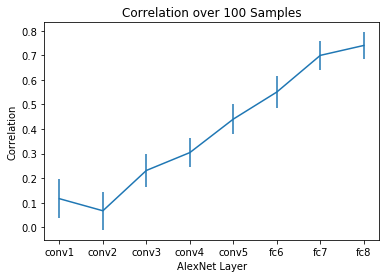

In [24]:
f, ax = plt.subplots(1,1)
ax.errorbar(range(len(masks_rand)), np.mean(coerrs, axis=0), yerr=np.std(coerrs, axis=0))
ax.set_xlabel('AlexNet Layer')
ax.set_ylabel('Correlation')
ax.set_title('Correlation over %d Samples' % num_samples)
plt.xticks(range(len(masks_rand)), blob_names)
plt.show()